In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import random
import math
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [3]:
def dbscan(D, eps, MinPts):
    labels = [0]*len(D)
    C = 0
    for P in range(0, len(D)):
        if not (labels[P] == 0):
           continue
        NeighborPts = region_query(D, P, eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1        
        else: 
           C += 1
           grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels


def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):    
        Pn = NeighborPts[i]
        if labels[Pn] == -1:
           labels[Pn] = C
        elif labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, Pn, eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
        i += 1


def region_query(D, P, eps):
    neighbors = []
    for Pn in range(0, len(D)):
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
    return neighbors

# Generating synthetic dataset using make_moons

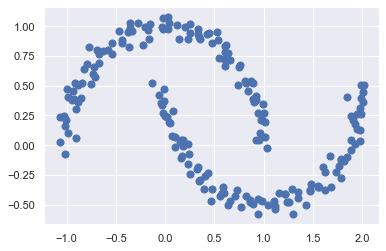

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
# DBSCAN in synthetic data
eps_range = [0.1,0.15,0.2,0.25,0.3]

for epsi in eps_range:
    labels = dbscan(X,epsi,4)
    print("epsilon value is ", epsi)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    for i in range(1,n_clusters_+1):
        n_labels = list(labels).count(i)
        print('Estimated number of points in dense region', i, ':','%d' % n_labels)

epsilon value is  0.1
Estimated number of clusters: 12
Estimated number of noise points: 16
Estimated number of points in dense region 1 : 17
Estimated number of points in dense region 2 : 8
Estimated number of points in dense region 3 : 11
Estimated number of points in dense region 4 : 23
Estimated number of points in dense region 5 : 20
Estimated number of points in dense region 6 : 28
Estimated number of points in dense region 7 : 17
Estimated number of points in dense region 8 : 21
Estimated number of points in dense region 9 : 12
Estimated number of points in dense region 10 : 5
Estimated number of points in dense region 11 : 17
Estimated number of points in dense region 12 : 5
epsilon value is  0.15
Estimated number of clusters: 2
Estimated number of noise points: 0
Estimated number of points in dense region 1 : 100
Estimated number of points in dense region 2 : 100
epsilon value is  0.2
Estimated number of clusters: 2
Estimated number of noise points: 0
Estimated number of point

## DBSCAN - IRIS dataset

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
iris = load_iris()

### finding epsilon

epsilon value is  0.3
Estimated number of clusters: 6
Estimated number of noise points: 82
Estimated number of points in dense region 1 : 37
Estimated number of points in dense region 2 : 4
Estimated number of points in dense region 3 : 13
Estimated number of points in dense region 4 : 4
Estimated number of points in dense region 5 : 4
Estimated number of points in dense region 6 : 6
Silhouette Coefficient -0.05857975493336704
epsilon value is  0.4
Estimated number of clusters: 4
Estimated number of noise points: 25
Estimated number of points in dense region 1 : 47
Estimated number of points in dense region 2 : 38
Estimated number of points in dense region 3 : 36
Estimated number of points in dense region 4 : 4
Silhouette Coefficient 0.32525548084540423
epsilon value is  0.412
Estimated number of clusters: 4
Estimated number of noise points: 25
Estimated number of points in dense region 1 : 47
Estimated number of points in dense region 2 : 38
Estimated number of points in dense region 

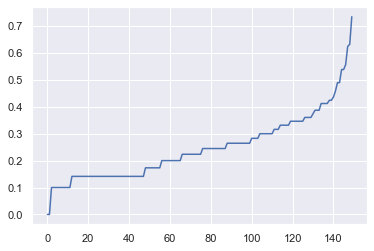

In [8]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(iris.data)
distances, indices = nbrs.kneighbors(iris.data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

eps_range = [0.3,0.4,0.412,0.5,0.6]

for epsi in eps_range:
    db_labels = dbscan(iris.data,epsi,4)
    if epsi == 0.4:
        predicted_labels_db = db_labels
    print("epsilon value is ", epsi)
    
    n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise_ = list(db_labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    
    for i in range(1,n_clusters_+1):
        n_labels = list(db_labels).count(i)
        print('Estimated number of points in dense region', i, ':','%d' % n_labels)
    
    print('Silhouette Coefficient', silhouette_score(iris.data, db_labels))

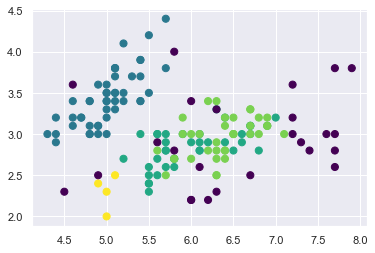

In [9]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=predicted_labels_db, s=50, cmap='viridis')

In [10]:
dataframe = pd.read_csv('Wholesale_customers_data.csv') 
dataframe.drop(columns=['Channel', 'Region'], inplace =True)

dataframe = pd.DataFrame({
    'x': dataframe['Fresh'],
    'y': dataframe['Milk'], 
})

## finding eps - whole sale customer dataset

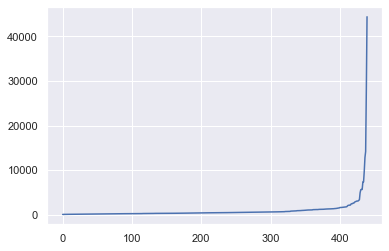

In [11]:
neigh = NearestNeighbors(n_neighbors=100)
nbrs = neigh.fit(dataframe)
distances, indices = nbrs.kneighbors(dataframe)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [13]:
eps_range = [2000,3000,4000,4500]

for epsi in eps_range:
    customer_db_labels = dbscan(np.array(dataframe),epsi,6)
    
    if epsi == 4000:
        db_customer_predicted_labels_db = customer_db_labels
        print(db_customer_predicted_labels_db)
    
    print("\nepsilon value is ", epsi)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(customer_db_labels)) - (1 if -1 in customer_db_labels else 0)
    n_noise_ = list(customer_db_labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    
    for i in range(1,n_clusters_+1):
        n_labels = list(customer_db_labels).count(i)
        print('Estimated number of points in dense region', i, ':','%d' % n_labels)
    
    #The silhouette score of 1 means that the clusters are very dense and nicely separated. 
    #The score of 0 means that clusters are overlapping. 
    #The score of less than 0 means that data belonging to clusters may be wrong/incorrect. 
    print('Silhouette Coefficient', silhouette_score(dataframe, customer_db_labels))


epsilon value is  2000
Estimated number of clusters: 2
Estimated number of noise points: 75
Estimated number of points in dense region 1 : 353
Estimated number of points in dense region 2 : 12
Silhouette Coefficient 0.3056954791977793

epsilon value is  3000
Estimated number of clusters: 2
Estimated number of noise points: 44
Estimated number of points in dense region 1 : 388
Estimated number of points in dense region 2 : 8
Silhouette Coefficient 0.5124349330837653
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 2, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 2, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, -1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1

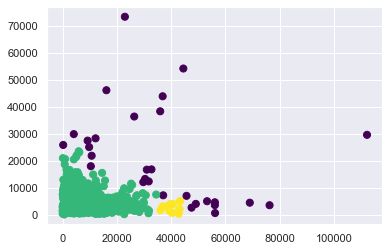

In [14]:
plt.scatter(dataframe['x'], dataframe['y'], c=db_customer_predicted_labels_db, s=50, cmap='viridis')